<a href="https://colab.research.google.com/github/sellabrinawr/SKRIPSI-PYTHON/blob/main/SKRIPSI_SELLA_BRINA_WINONA_RIZKY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LINK AKSES DATASET

In [1]:
# Untuk DataSetnya Bisa di akses pada link di bawah ini :

# Link Raw Data : https://drive.google.com/drive/folders/1AwD6U4ZWNQz3hG5u4Eb1kug17enov5cO?usp=drive_link

# Link Data Cleaning : https://drive.google.com/drive/folders/1lKQfMR8kqA4BTIcrL1gDYrJe2_eJqGGG?usp=drive_link

# Link Agregasi Data : https://drive.google.com/drive/folders/1ZjWlehD1bURIrrZ59nKz_3omuKIvekMO?usp=sharing

# Link Transformasi Data : https://drive.google.com/drive/folders/17qSVsfLYAzyerQvxMGRBX5aeju_St52t?usp=drive_link


# 2. IMPORT LIBRARY

In [2]:
from google.colab import files
import pandas as pd
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np


## Upload Data

In [3]:
# Upload file transformasi data
uploaded = files.upload()


Saving Hasil Transformasi Data Wisatawan Nusantara.xlsx to Hasil Transformasi Data Wisatawan Nusantara.xlsx


In [4]:
# Baca file Excel
df = pd.read_excel("Hasil Transformasi Data Wisatawan Nusantara.xlsx")
df.head()

,No,Kabupaten/Kota,Jumlah Perjalanan Tahun 2023-2024,Jumlah Pergerakan Tahun 2023-2024
0,1,Kabupaten Bangkalan,9645244,9300481
1,2,Kabupaten Banyuwangi,13523593,4936672
2,3,Kabupaten Blitar,10587586,5768284
3,4,Kabupaten Bojonegoro,10584435,971743
4,5,Kabupaten Bondowoso,6259131,1029243


## Hitung Total Kunjungan

In [5]:
# Buat kolom Total Kunjungan dengan nama kolom yang benar
df['Total Kunjungan'] = df['Jumlah Perjalanan Tahun 2023-2024'] + df['Jumlah Pergerakan Tahun 2023-2024']

## Grafik Bar – Top 5 Kunjungan Tertinggi

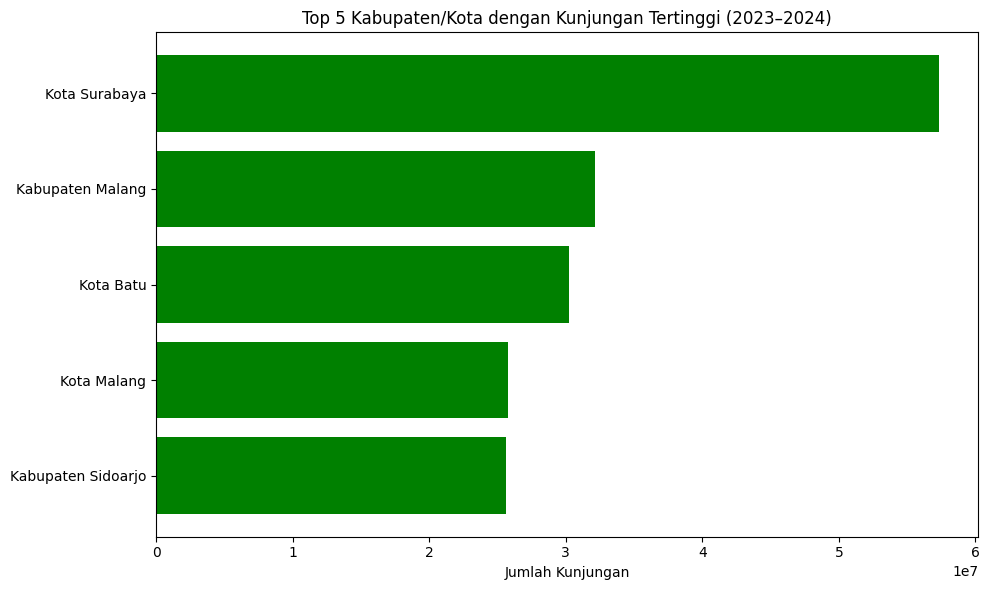

In [6]:
# Top 5
top5 = df.sort_values(by='Total Kunjungan', ascending=False).head(5)
plt.figure(figsize=(10,6))
plt.barh(top5['Kabupaten/Kota'], top5['Total Kunjungan'], color='green')
plt.xlabel('Jumlah Kunjungan')
plt.title('Top 5 Kabupaten/Kota dengan Kunjungan Tertinggi (2023–2024)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Grafik Bar – Bottom 5 Kunjungan Terendah

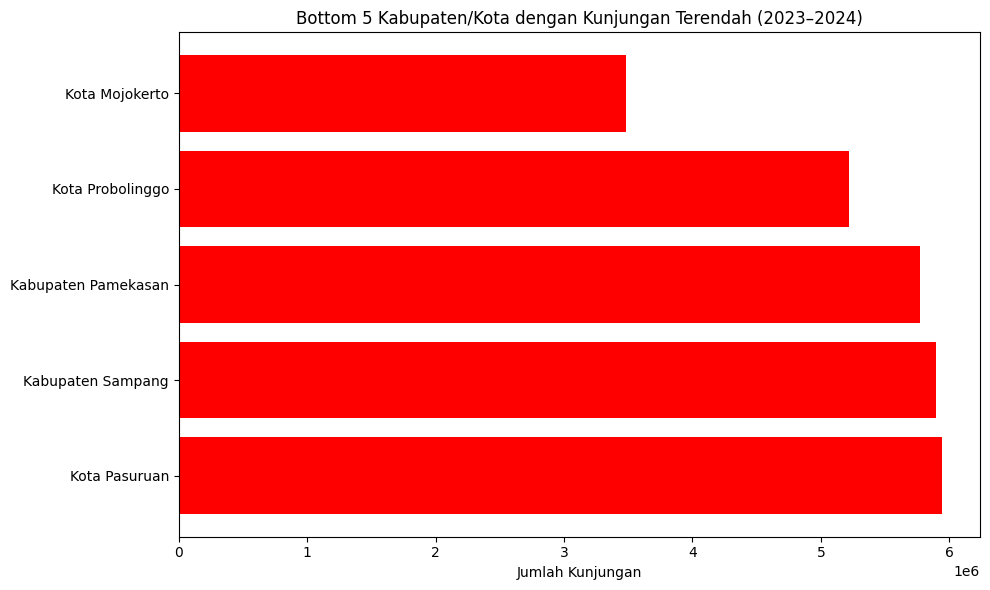

In [7]:
# Bottom 5
bottom5 = df.sort_values(by='Total Kunjungan', ascending=True).head(5)
plt.figure(figsize=(10,6))
plt.barh(bottom5['Kabupaten/Kota'], bottom5['Total Kunjungan'], color='red')
plt.xlabel('Jumlah Kunjungan')
plt.title('Bottom 5 Kabupaten/Kota dengan Kunjungan Terendah (2023–2024)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. NORMALISASI DATA (Min-Max Scalling)

In [8]:
# Ambil kolom numerik
X = df[['Jumlah Perjalanan Tahun 2023-2024', 'Jumlah Pergerakan Tahun 2023-2024']]

# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-Means Clustering


## Penentuan Jumlah Klaster (Elbow Method)

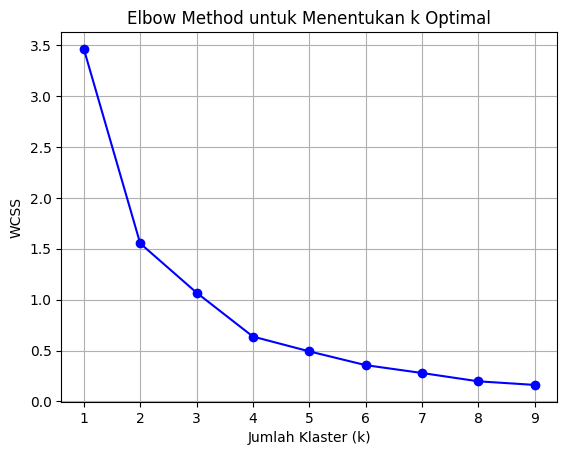

In [9]:
# penentuan jumlah klaster (k-means)
wcss = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.grid()
plt.show()

## Implementasi K-means

In [10]:
# implementasi k-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Tambahkan ke dataframe
df['Cluster_KMeans'] = kmeans_labels

## Scatter Plot

In [11]:
# Pastikan nama kolom tidak ada spasi aneh
df.columns = df.columns.str.strip()

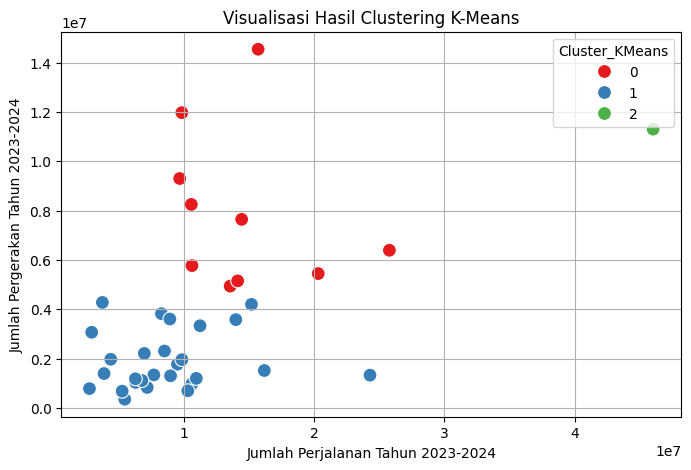

In [12]:
# Visualisasi klaster hasil K-Means
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Jumlah Perjalanan Tahun 2023-2024',
    y='Jumlah Pergerakan Tahun 2023-2024',
    hue='Cluster_KMeans',
    palette='Set1',
    s=100  # ukuran titik
)

plt.title('Visualisasi Hasil Clustering K-Means')
plt.xlabel('Jumlah Perjalanan Tahun 2023-2024')
plt.ylabel('Jumlah Pergerakan Tahun 2023-2024')
plt.grid(True)
plt.show()

## Menampilkan Daftar Kabupaten/Kota per Klaster

In [13]:
# Menampilkan daftar kabupaten/kota per klaster
for i in sorted(df['Cluster_KMeans'].unique()):
    print(f"\n=== Klaster {i} ===")
    print(df[df['Cluster_KMeans'] == i]['Kabupaten/Kota'].values)


=== Klaster 0 ===
['Kabupaten Bangkalan' 'Kabupaten Banyuwangi' 'Kabupaten Blitar'
 'Kabupaten Gresik' 'Kabupaten Kediri' 'Kabupaten Lamongan'
 'Kabupaten Malang' 'Kabupaten Tuban' 'Kota Batu' 'Kota Malang']

=== Klaster 1 ===
['Kabupaten Bojonegoro' 'Kabupaten Bondowoso' 'Kabupaten Jember'
 'Kabupaten Jombang' 'Kabupaten Lumajang' 'Kabupaten Madiun'
 'Kabupaten Magetan' 'Kabupaten Mojokerto' 'Kabupaten Nganjuk'
 'Kabupaten Ngawi' 'Kabupaten Pacitan' 'Kabupaten Pamekasan'
 'Kabupaten Pasuruan' 'Kabupaten Ponorogo' 'Kabupaten Probolinggo'
 'Kabupaten Sampang' 'Kabupaten Sidoarjo' 'Kabupaten Situbondo'
 'Kabupaten Sumenep' 'Kabupaten Trenggalek' 'Kabupaten Tulungagung'
 'Kota Blitar' 'Kota Kediri' 'Kota Madiun' 'Kota Mojokerto'
 'Kota Pasuruan' 'Kota Probolinggo']

=== Klaster 2 ===
['Kota Surabaya']


# 4. Clustering Menggunakan Hierarchical


## Penerapan Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Inisialisasi model Hierarchical (Agglomerative) dengan 3 klaster
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Prediksi label klaster
agglo_labels = agglo.fit_predict(X_scaled)

# Tambahkan ke dataframe
df['Cluster_Hierarchical'] = agglo_labels


## Visualisasi Klaster

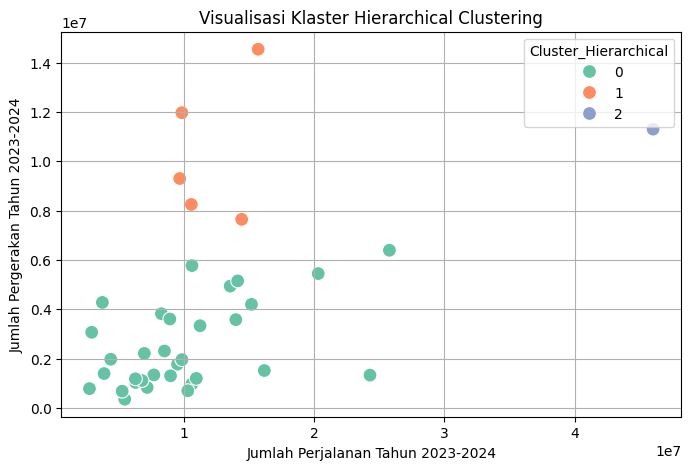

In [15]:
# scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom rapi
df.columns = df.columns.str.strip()

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Jumlah Perjalanan Tahun 2023-2024',
    y='Jumlah Pergerakan Tahun 2023-2024',
    hue='Cluster_Hierarchical',
    palette='Set2',
    s=100
)
plt.title('Visualisasi Klaster Hierarchical Clustering')
plt.xlabel('Jumlah Perjalanan Tahun 2023-2024')
plt.ylabel('Jumlah Pergerakan Tahun 2023-2024')
plt.grid(True)
plt.show()


## Dendrogram

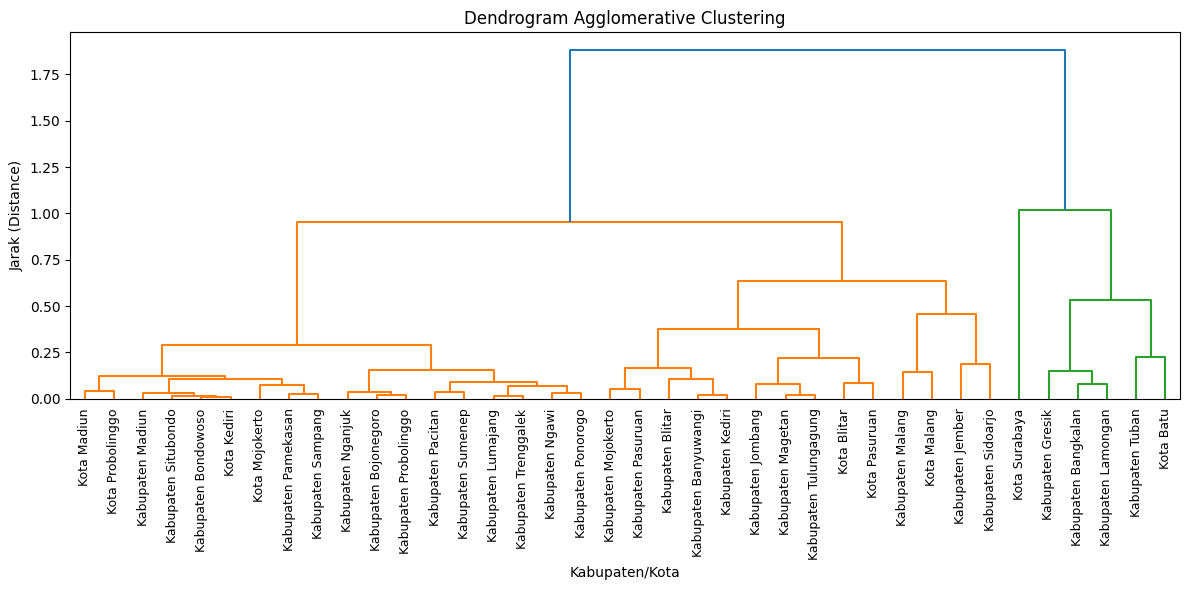

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Bangun linkage matrix
Z = linkage(X_scaled, method='ward')

# Buat dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=df['Kabupaten/Kota'].values,
    leaf_rotation=90,
    leaf_font_size=9
)
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jarak (Distance)')
plt.tight_layout()
plt.show()


# 5. Evaluasi Kualitas Klaster

In [17]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X_scaled, df['Cluster_KMeans'])
silhouette_hier = silhouette_score(X_scaled, df['Cluster_Hierarchical'])

print("Silhouette Score - KMeans:", silhouette_kmeans)
print("Silhouette Score - Hierarchical:", silhouette_hier)


Silhouette Score - KMeans: 0.5230063930493147
Silhouette Score - Hierarchical: 0.5689141431573489


In [18]:
from sklearn.metrics import calinski_harabasz_score

ch_kmeans = calinski_harabasz_score(X_scaled, df['Cluster_KMeans'])
ch_hier = calinski_harabasz_score(X_scaled, df['Cluster_Hierarchical'])

print("CH Index - KMeans:", ch_kmeans)
print("CH Index - Hierarchical:", ch_hier)


CH Index - KMeans: 39.230687944047276
CH Index - Hierarchical: 34.119429142678946


In [19]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    n_clusters = len(unique_clusters)

    # Hitung jarak minimum antar klaster (inter-cluster distance)
    min_intercluster = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X[labels == unique_clusters[i]]
            cluster_j = X[labels == unique_clusters[j]]
            dist_ij = cdist(cluster_i, cluster_j)
            min_dist = np.min(dist_ij)
            if min_dist < min_intercluster:
                min_intercluster = min_dist

    # Hitung diameter maksimum (intra-cluster distance)
    max_intracluster = 0
    for k in unique_clusters:
        cluster_k = X[labels == k]
        if len(cluster_k) > 1:
            intra_dist = cdist(cluster_k, cluster_k)
            max_dist = np.max(intra_dist)
            if max_dist > max_intracluster:
                max_intracluster = max_dist

    # Dunn Index = jarak antar klaster terdekat / diameter klaster terbesar
    return min_intercluster / max_intracluster


In [20]:
# Dunn Index untuk K-Means
dunn_kmeans = dunn_index(X_scaled, df['Cluster_KMeans'])

# Dunn Index untuk Hierarchical
dunn_hier = dunn_index(X_scaled, df['Cluster_Hierarchical'])

print("Dunn Index - KMeans:", dunn_kmeans)
print("Dunn Index - Hierarchical:", dunn_hier)


Dunn Index - KMeans: 0.09500279691088712
Dunn Index - Hierarchical: 0.23967248315296608
